# Computational Finance
## Series 4
Tientso Ning

In [69]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
np.random.seed(1) #set random seed to 1

## Time Average

In [7]:
#artificial time series
x = 100 + np.cumsum(0.5-np.random.random(1000))

Text(0.5, 1.0, 'Artificial Times Series')

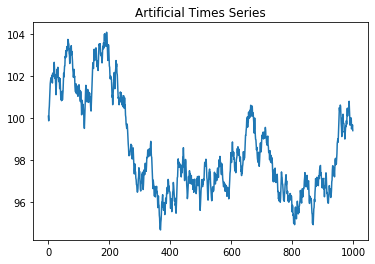

In [10]:
#visualize the time series
plt.plot(x)
plt.title("Artificial Times Series")

In [61]:
#draw the moving average for N = 100
N = 100
a = [2/(N+1),0.1,0.01]

def MA(ts, N):
    L = len(ts)
    assert L%N == 0
    
    ma = []
    for i in range(0,L,N):
        ma.append(np.sum(ts[i:i+N])/N)
    return ma

def EMA(ts, t, a):
    
    if t == 0:
        return ts[t]*a
    else:
        return (a*ts[t]) + (1-a)*EMA(ts, t-1, a)

Text(0.5, 1.0, 'Moving Average N = 100 for X')

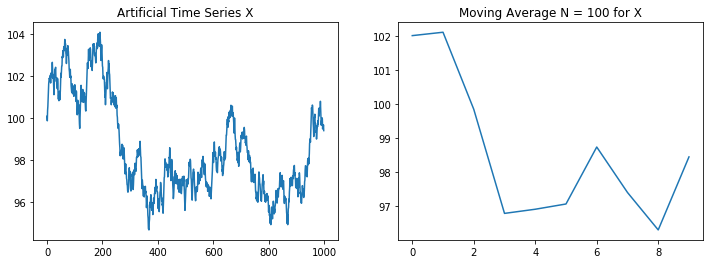

In [19]:
f, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].plot(x)
ax[0].set_title("Artificial Time Series X")
ax[1].plot(MA(x, N))
ax[1].set_title("Moving Average N = 100 for X")

Text(0.5, 1.0, 'EMA of X, a = 0.01')

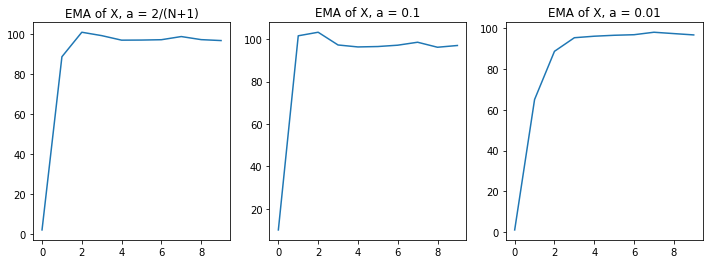

In [65]:
ema = []
for i in range(0, len(x), N):
    ema.append(EMA(x, i, a[0]))

ema1 = []
for i in range(0, len(x), N):
    ema1.append(EMA(x, i, a[1]))

ema2 = []
for i in range(0, len(x), N):
    ema2.append(EMA(x, i, a[2]))
    
    
f, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(ema)
ax[1].plot(ema1)
ax[2].plot(ema2)
ax[0].set_title("EMA of X, a = 2/(N+1)")
ax[1].set_title("EMA of X, a = 0.1")
ax[2].set_title("EMA of X, a = 0.01")


Here we can see that with alpha = 0.1 and 0.01, we notice that the increase in smoothing factor removes this sort of "bump" or decrease as time progresses.
Additionally, we notice that 2/(N+1) as a scaling factor is prone to this as well.

## Scaling Law

             timestamp      bid      ask
0  2012-01-01 16:57:32  1.29475  1.29575
1  2012-01-01 16:57:44  1.29375  1.29475
2  2012-01-01 16:58:23  1.29366  1.29466
3  2012-01-01 17:00:43  1.29359  1.29459
4  2012-01-01 17:01:41  1.29343  1.29443
1519768


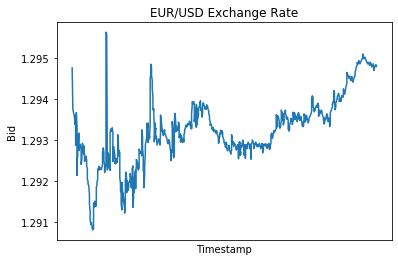

In [70]:
#read data from file
data = pd.read_table("./timeseries.dat", header=None, names=["timestamp", "bid", "ask"])
data["timestamp"] = data["timestamp"].apply(lambda x : time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(x)))
print(data.head())
print(len(data))
#plot test
plt.plot("timestamp","bid",data=data.head(1000))
plt.xticks([])
plt.title("EUR/USD Exchange Rate")
plt.xlabel("Timestamp")
plt.ylabel("Bid")
plt.show()

In [113]:
#determining directional change
def DC(ts, delta):
    change = 0
    for i in range(0, len(ts)):
        
        if i == 0:
            pass
        else:
            if abs((ts[i]-ts[i-1])/ts[i-1]) >= delta: #directional change
                change += 1
            else:
                pass
    return change

In [114]:
#compute the number of directional changes with delta = 0.01 and 0.001
delta = [0.01, 0.0075, 0.005, 0.0025, 0.001]
dcs = []
for i in range(0, len(delta)):
    dc = DC(data['bid'].head(200000), delta[i])
    print("Delta = {0}: ".format(delta[i]), dc)
    dcs.append(dc)

Delta = 0.01:  0
Delta = 0.0075:  0
Delta = 0.005:  0
Delta = 0.0025:  1
Delta = 0.001:  4


Text(0.5, 1.0, 'Log-Log of DC as function of Delta')

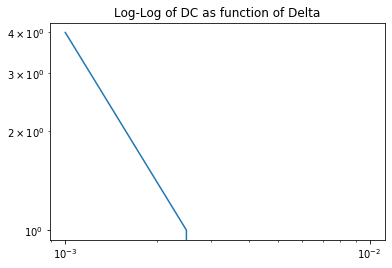

In [115]:
plt.loglog(delta, dcs)
plt.title("Log-Log of DC as function of Delta")

We can see that the more we decrease the delta value, we get more events that can be considered a directional change.